
### Project description: 
This is a market analysis of open-source data on restaurants in Los Angeles, the purpose of this analysis is to help explain to investors the potential profitability in opening a small robot-run cafe in Los Angeles 

## Step 1. Download the data and prepare it for analysis
<b> Download the data on restaurants in LA. Make sure that the data type for each column is correct and that there are no missing values or duplicates. Process them if necessary. </b>


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math
from scipy.stats import stats
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns




Importing all the necessary libraries

In [2]:
try:    
    data = pd.read_csv('rest_data_us.csv')
except:
    data = pd.read_csv('/datasets/rest_data_us.csv')

In [3]:
!pip install usaddress
import usaddress


Examining the data, looking for NaN's and abnormal values. 
Since on question number 6 we need to work on the street name data, I will address it on that section. 
The chain column has 3 NaN values, they will be addressed in question number 3.

In [4]:
data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [6]:
data['number'].describe() 

count    9651.000000
mean       43.695161
std        47.622874
min         1.000000
25%        14.000000
50%        27.000000
75%        46.000000
max       229.000000
Name: number, dtype: float64

In [7]:
data[data['chain'].isnull()]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


The number column appears to have some establishments with only one seat. This is obviously a logging mistake of some sort, if this was one or two establishments this night not be an issue, but 187 is 1.9% and might obscure data. 
With this I decided that the establishments with 2 seats might not be logical, however they make more sense then one seat, as some Bakery’s have a couple of seats that are not official, or Restaurant’s that mostly have take away’s, I have corrected this data with the median seats per object_name.
 

In [8]:
data['number'].unique()

array([ 26,   9,  20,  22,  14, 100,   7,   1,  35,  38,  17, 133,  18,
        21, 147,  10, 139, 103,  16,  39,   4,  43,  48,  19,  80,  31,
        15,   5, 118, 182,  49,  13,  37, 158,  45,  33,  28,   8,  27,
         2, 184,  24,  66,  11, 112,  40,  25,  29, 122,   3, 219,  63,
       121, 163,   6,  88,  75, 131,  42,  32, 128, 224,  36,  12, 200,
       205,  71,  23, 107, 134,  73,  62, 140,  79,  70, 225, 149,  44,
       221, 157,  34, 123, 138, 116, 108,  85,  41, 155,  46,  77, 111,
       143,  96, 146,  97, 129, 124, 130,  91, 109,  81,  69, 117,  47,
       167, 209, 217, 185, 135, 164, 162, 113,  89, 151, 196, 127,  84,
       115,  86, 190,  92, 148,  98, 227, 141, 197, 145, 229, 213, 222,
        64,  95, 101, 208, 102,  61,  65, 166, 170,  74, 187, 169, 119,
        99, 110, 104,  90, 186, 189, 142,  87, 171, 198, 136, 106, 203,
       210, 226,  82, 199,  67, 194,  68, 125, 126, 218, 180, 132, 212,
       161,  83, 193, 192, 181, 175, 204, 160, 174, 159, 144, 15

In [9]:
data[data['number']==1]

,id,object_name,address,chain,object_type,number
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
35,11821,REGGIE'S DELI & CAFE,1910 W SUNSET BLVD STE 150,True,Restaurant,1
93,11879,TACOMIENDO,11462 GATEWAY BLVD,False,Fast Food,1
139,11925,KIKKA SUSHI,308 WESTWOOD PLZ # A233B,True,Restaurant,1
265,12051,LUCKY STRIKE HOLLYWOOD,6801 HOLLYWOOD BLVD STE #143,False,Restaurant,1
...,...,...,...,...,...,...
9562,21348,7-ELEVEN STORE #18778D,7600 W SUNSET BLVD,False,Restaurant,1
9566,21352,THE BUTLER'S KITCHEN,5616 E BEVERLY BLVD,False,Restaurant,1
9589,21375,WHITE AND BROWN,603 S MARIPOSA AVE,False,Restaurant,1
9600,21386,YAKITORI TEN,3470 W 6TH ST STE 2A,False,Restaurant,1


In [10]:
data[data['number']==2]

,id,object_name,address,chain,object_type,number
58,11844,BASE COAT -JUICE BAR,704 MATEO ST,True,Bar,2
59,11845,WAX PAPER,2902 KNOX AVE,False,Restaurant,2
153,11939,HAYATO,1320 E 7TH ST # 126,False,Restaurant,2
179,11965,LE BALCON BAKERY,1523 LA BREA AVE,True,Bakery,2
207,11993,CLIFTON'S CAFETERIA,648 S BROADWAY,False,Restaurant,2
...,...,...,...,...,...,...
9499,21285,ASHER CAFFE,945 S BOYLE AVE,False,Restaurant,2
9509,21295,HUERTA'S PRODUCE,1689 EASTERN AVE,False,Restaurant,2
9563,21349,TOM N TOMS,3829 6TH ST,True,Restaurant,2
9598,21384,GOOD PEOPLE COFFEE CO,11609 SANTA MONICA BLVD,False,Cafe,2


I'm using the median value to replace the establishments seat number.

In [11]:
seating_grouped=data.groupby(['object_type'])['number'].median().reset_index()

diction={'Bakery':'🎂','Fast Food':'🍔',
                           'Bar':'🍷','Cafe':'🍲','Pizza':'🍕',
                           'Restaurant':'🍽️'}
seating_grouped['emoji1'] =seating_grouped['object_type'].apply(lambda x: diction.get(x))


In [12]:
seating_grouped

,object_type,number,emoji1
0,Bakery,18.0,🎂
1,Bar,28.5,🍷
2,Cafe,21.0,🍲
3,Fast Food,21.0,🍔
4,Pizza,18.5,🍕
5,Restaurant,29.0,🍽️


Some cute emojis for the median table :)

In [13]:
data[data['number']==1]

,id,object_name,address,chain,object_type,number
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
35,11821,REGGIE'S DELI & CAFE,1910 W SUNSET BLVD STE 150,True,Restaurant,1
93,11879,TACOMIENDO,11462 GATEWAY BLVD,False,Fast Food,1
139,11925,KIKKA SUSHI,308 WESTWOOD PLZ # A233B,True,Restaurant,1
265,12051,LUCKY STRIKE HOLLYWOOD,6801 HOLLYWOOD BLVD STE #143,False,Restaurant,1
...,...,...,...,...,...,...
9562,21348,7-ELEVEN STORE #18778D,7600 W SUNSET BLVD,False,Restaurant,1
9566,21352,THE BUTLER'S KITCHEN,5616 E BEVERLY BLVD,False,Restaurant,1
9589,21375,WHITE AND BROWN,603 S MARIPOSA AVE,False,Restaurant,1
9600,21386,YAKITORI TEN,3470 W 6TH ST STE 2A,False,Restaurant,1


No more 1's in the number column

In [14]:
data['object_type'].unique()

array(['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'],
      dtype=object)

The object_type column has no NaN values or odd names. 

## Step 2. Data analysis

### 1. Investigate the proportions of the various types of establishments. Plot a graph.

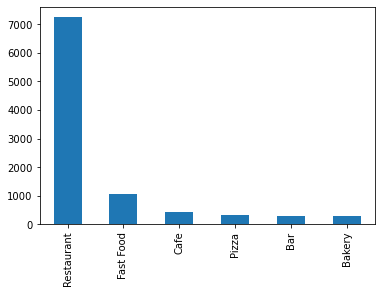

In [15]:
data['object_type'].value_counts().plot(kind='bar');

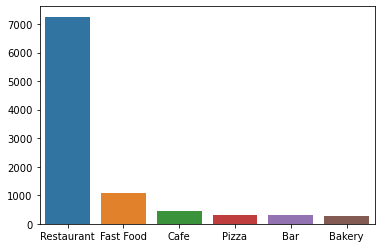

In [16]:
sns.barplot(x=data['object_type'].value_counts().index, y=data['object_type'].value_counts().values);

After plotting the graph it's clear that the bar plot is not the best representation of the proportions of each establishment.
In order to enhance the visual proportions I decided to plot a pie chart.  

In [17]:
object_ratio=data.groupby(['object_type'])['id'].count().reset_index()
object_ratio['ratio']=100*object_ratio['id']/object_ratio['id'].sum()
object_ratio

,object_type,id,ratio
0,Bakery,283,2.932339
1,Bar,292,3.025593
2,Cafe,435,4.507305
3,Fast Food,1066,11.045488
4,Pizza,320,3.315719
5,Restaurant,7255,75.173557


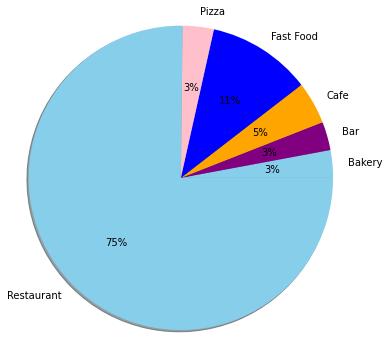

In [18]:
mycolors = ["skyblue", "purple", "orange", "blue", "pink"]

plt.pie(data=object_ratio, x = 'ratio', labels = 'object_type', autopct='%.0f%%' ,colors = mycolors, shadow = True, radius=1.75);


After plotting the pie chart it's much easier to notice the differences in the relative sizes of the sections in the graph. 


### 2. Investigate the proportions of chain and nonchain establishments. Plot a graph.

In [19]:
data['chain'].value_counts()

False    5972
True     3676
Name: chain, dtype: int64

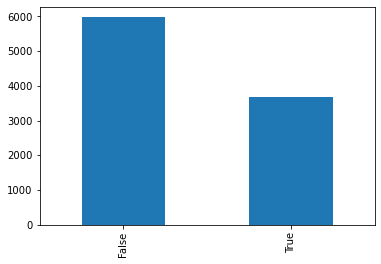

In [20]:
data['chain'].value_counts().plot(kind='bar');

Chain and non chain establishments, the non chain establishment is clearly a greater number. 

### 3. Which type of establishment is typically a chain?

The chain column has 3 NaN's, I searched these restaurants on Google and the first two are not chains. The last restaurants is a chain, so I manually corrected the data. 

In [21]:
data['chain'].unique()

array([False, True, nan], dtype=object)

In [22]:
data['chain'].isnull().sum()

3

In [23]:
data[data['chain'].isnull()]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [24]:
data.loc[7408, 'chain']= False
data.loc[7523, 'chain']= False
data.loc[8648, 'chain']= True 

In [25]:
data[data['chain'].isnull()]

,id,object_name,address,chain,object_type,number


In [26]:
data['chainint']=data['chain'].astype(int)
data.head()

,id,object_name,address,chain,object_type,number,chainint
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,0
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,0
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,0
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,0
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,0


In [27]:
dt_ratio=data.groupby(data['object_type'])['chainint'].sum().reset_index()
dt_ratio

,object_type,chainint
0,Bakery,283
1,Bar,77
2,Cafe,266
3,Fast Food,605
4,Pizza,153
5,Restaurant,2293


In [28]:
dt_ratios=data.groupby(data['object_type'])['id'].count().reset_index()
dt_ratios

,object_type,id
0,Bakery,283
1,Bar,292
2,Cafe,435
3,Fast Food,1066
4,Pizza,320
5,Restaurant,7255


In [29]:
dt_ratio = dt_ratio.merge(dt_ratios, how='left', on=['object_type'])
dt_ratio['not_chain']=dt_ratio['id']-dt_ratio['chainint']
dt_ratio

,object_type,chainint,id,not_chain
0,Bakery,283,283,0
1,Bar,77,292,215
2,Cafe,266,435,169
3,Fast Food,605,1066,461
4,Pizza,153,320,167
5,Restaurant,2293,7255,4962


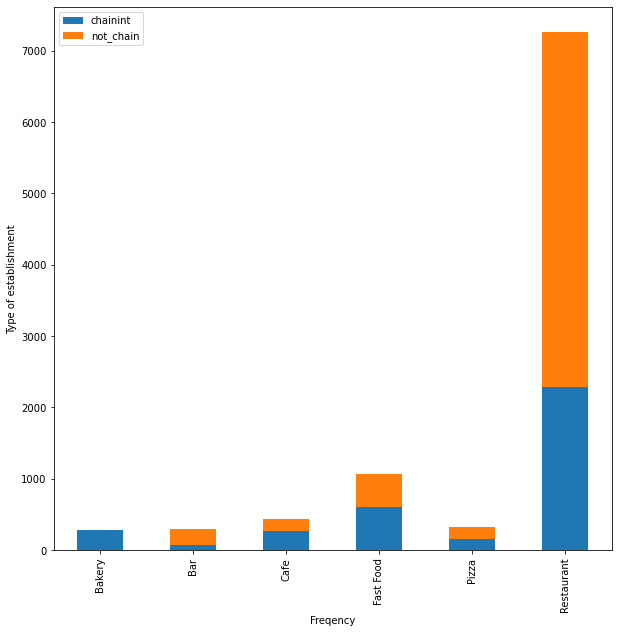

In [30]:
index=["object_type"]
dt_ratio.plot(x='object_type', y= ['chainint', 'not_chain'], figsize=(10,10) , stacked=True , kind='bar');

plt.xlabel("Freqency");
plt.ylabel("Type of establishment");

In [31]:
dt_ratio_percent = dt_ratio
dt_ratio_percent['ratio'] = 100*dt_ratio_percent['chainint']/dt_ratio_percent['id']
dt_ratio_percent

,object_type,chainint,id,not_chain,ratio
0,Bakery,283,283,0,100.000000
1,Bar,77,292,215,26.369863
2,Cafe,266,435,169,61.149425
3,Fast Food,605,1066,461,56.754221
4,Pizza,153,320,167,47.812500
5,Restaurant,2293,7255,4962,31.605789


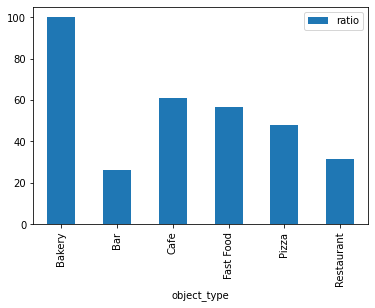

In [32]:
dt_ratio_percent.plot(x='object_type' ,y='ratio' , kind='bar');

In [33]:
grouped_set=data.groupby(['object_type'])['id'].nunique().reset_index()

According to the information in this data set, all the bakery's in Los Angeles are part of a chain, 61% cafe's are chains and right behind them are the fast food and pizza establishments. 
This is surprising information, fast foods tend to be chains. We tend to think of the large number of visible chain restaurants but forget about the "long-tail" of convenient outlets (taco stands for instance).
Maybe the LA residents prefer establishments that are not chains.   

### 4. What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

In [34]:
rest_grouped=data[data.chain==True].groupby(['object_name'])['number'].agg(['count','median']).reset_index()
rest_grouped.columns=['name','number','average_seating']

rest_grouped=rest_grouped.sort_values(by='average_seating', ascending=False)

In [35]:
print(rest_grouped.shape)
rest_grouped.head(5)

(2734, 3)


,name,number,average_seating
1572,MOUNTAINGATE COUNTRY CLUB,1,229.0
390,CHUCK E CHEESE'S #397,1,228.0
2578,USC MAIN KITCHEN-BASEMENT,1,227.0
1495,MCDONALD'S #5968,1,227.0
387,CHOSUN GALBEE RESTAURANT,1,226.0


In [36]:
rest_grouped.tail(5)

,name,number,average_seating
54,ANGELICA'S BAKERY,1,1.0
1414,MARKET RESTAURANT @ LA MART,1,1.0
1171,LA FIESTA BAKERY AND RESTAURANT,1,1.0
1170,LA FIESTA BAKERY,1,1.0
1746,PARU'S INDIAN RESTAURANT,1,1.0


In [37]:
#to_power2 = 'to_power2.xlsx' 
#rest_grouped.to_excel(to_power2)

In [38]:
rest_grouped['average_seating'].describe()

count    2734.000000
mean       41.358998
std        44.311443
min         1.000000
25%        14.000000
50%        26.000000
75%        45.000000
max       229.000000
Name: average_seating, dtype: float64

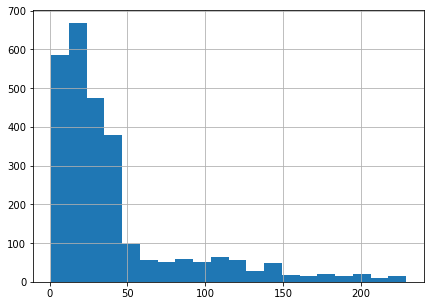

In [39]:
rest_grouped['average_seating'].hist(figsize=(7,5), bins=20);

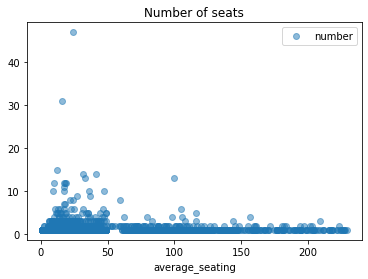

In [40]:
rest_grouped.plot(x='average_seating', y='number', style='o', alpha=0.5, title= 'Number of seats');

This is the general number of seats graph (chain and non chain).

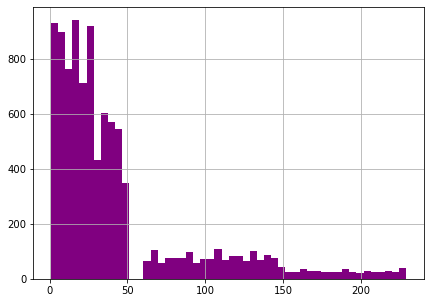

In [41]:
data['number'].hist(figsize=(7,5), bins=50, color='purple');

Many establishments with a small number of seats.
As I assumed at the start of the analysis the establishments with 2 seats seem to mostly be delis and bakery's, the higher seat counts are from large chain establishments.

### 5. Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.

In [42]:
seating_grouped=seating_grouped.sort_values(by='number', ascending=False)
seating_grouped

,object_type,number,emoji1
5,Restaurant,29.0,🍽️
1,Bar,28.5,🍷
2,Cafe,21.0,🍲
3,Fast Food,21.0,🍔
4,Pizza,18.5,🍕
0,Bakery,18.0,🎂


In [43]:
lable=seating_grouped['emoji1']
lable

5    🍽️
1     🍷
2     🍲
3     🍔
4     🍕
0     🎂
Name: emoji1, dtype: object

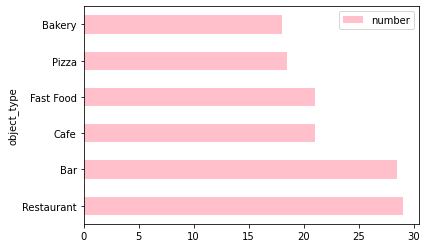

In [44]:
seating_grouped.plot.barh( x='object_type' ,y='number', color="pink");
#unfortunatly did not manage to add the emojis to the table :(


Restaurant are the establishments with the highest average number of seats fallowed by bars. Considering that the outliers in this data range between 2 and 228 the average here reflects on those very strong outliers, my assumption is that in general most of the establishments are about 25 seat.

### 6. Put the data on street names from the address column in a separate column.

In [45]:
street_example=data.iloc[0]['address']
street_example

'3708 N EAGLE ROCK BLVD'

Taking a look at the address structure and testing out the new library.  

In [46]:
usaddress.parse(street_example)

[('3708', 'AddressNumber'),
 ('N', 'StreetNamePreDirectional'),
 ('EAGLE', 'StreetName'),
 ('ROCK', 'StreetName'),
 ('BLVD', 'StreetNamePostType')]

In [47]:
raw_address=usaddress.parse(street_example)
raw_address

[('3708', 'AddressNumber'),
 ('N', 'StreetNamePreDirectional'),
 ('EAGLE', 'StreetName'),
 ('ROCK', 'StreetName'),
 ('BLVD', 'StreetNamePostType')]

Testing out the new method

In [48]:
dict_address={}
for i in raw_address:
    dict_address.update({i[1]:i[0]})

In [49]:
dict_address

{'AddressNumber': '3708',
 'StreetNamePreDirectional': 'N',
 'StreetName': 'ROCK',
 'StreetNamePostType': 'BLVD'}

In [50]:
dict_address['StreetName']+','+dict_address['AddressNumber']

'ROCK,3708'

In [51]:
def cleaning_1(raw):
    raw_address=usaddress.parse(raw)
    dict_address={}
    for i in raw_address:
        dict_address.update({i[1]:i[0]})
    clean_adress=dict_address['AddressNumber']+","+str(dict_address['StreetName'])
    return clean_adress

In [52]:
data.address.sample(5).apply(cleaning_1)

9625       6545,MONICA
9393     307,JEFFERSON
8241       4963,SUNSET
6013    6245,HOLLYWOOD
3359      6325,WESTERN
Name: address, dtype: object

In [53]:
def cleaning_check(raw):
    raw_address=usaddress.parse(raw)
    dict_address={}
    for i in raw_address:
        dict_address.update({i[1]:i[0]})
    #this line below checks for normal case with street and number    
    if 'StreetName' in dict_address.keys() and 'AddressNumber' in dict_address.keys():
        clean_adress=dict_address['AddressNumber']+","+str(dict_address['StreetName'])
        return clean_adress
    else:
        return 'no street or number'

In [54]:
data['clean_street_check']=data.address.apply(cleaning_check)

In [55]:
data[data['clean_street_check']=='no street or number']

,id,object_name,address,chain,object_type,number,chainint,clean_street_check
1888,13674,MAGDALENO DEBBIE,OLVERA ST E17,False,Restaurant,15,0,no street or number
3719,15505,LAS ANITAS,OLVERA ST 26,False,Restaurant,38,0,no street or number
7003,18789,D.K. DONUTS,1033 1/2 LOS ANGELES ST,False,Fast Food,8,0,no street or number
7281,19067,CIELITO LINDO,OLVERA ST 23,False,Restaurant,2,0,no street or number
7319,19105,JUANITA'S CAFE,OLVERA ST 20,False,Restaurant,12,0,no street or number
7321,19107,KITTY'S SNOW CONES,OLVERA ST 2,False,Restaurant,11,0,no street or number
7327,19113,LA NOCHE BUENA,OLVERA ST E8,False,Restaurant,1,0,no street or number
7438,19224,LA GOLONDRINA,OLVERA ST W17,False,Restaurant,204,0,no street or number
7741,19527,RODOLFO'S RESTAURANT,OLVERA ST 5,True,Restaurant,4,1,no street or number


In [56]:
usaddress.parse(data.iloc[1888]['address'])

[('OLVERA', 'PlaceName'), ('ST', 'StateName'), ('E17', 'ZipCode')]

In [57]:
def cleaning_final(raw):
    if raw.startswith('OLVERA'):
        clean_adress='OLVERA,Los Angeles,USA'
    elif raw.startswith('1033 1/2 LOS ANGELES'):
        clean_adress='1033 1/2 LOS ANGELES ST,Los Angeles,USA'
    else:
        raw_address=usaddress.parse(raw)
        dict_address={}
        for i in raw_address:
            dict_address.update({i[1]:i[0]})
        clean_adress=dict_address['AddressNumber']+" "+str(dict_address['StreetName'])+str(', Los Angeles,USA')
    return clean_adress

In [58]:
data['clean_street_final']=data.address.apply(cleaning_final)
data.sample(10)

,id,object_name,address,chain,object_type,number,chainint,clean_street_check,clean_street_final
7649,19435,HONG KONG BOWL,1632 E FIRESTONE BLVD,True,Restaurant,1,1,"1632,FIRESTONE","1632 FIRESTONE, Los Angeles,USA"
2692,14478,CHINA GATE,11814 S WILMINGTON AVE,False,Restaurant,23,0,"11814,WILMINGTON","11814 WILMINGTON, Los Angeles,USA"
8679,20465,KOMASA RESTAURANT,351 E 2ND ST,True,Restaurant,20,1,"351,2ND","351 2ND, Los Angeles,USA"
84,11870,KOREAN AIR/ SKYTEAM LOUNGE,380 WORLD WAY S4,False,Restaurant,219,0,"380,WORLD","380 WORLD, Los Angeles,USA"
5527,17313,FIDEL'S PIZZA,307 N AVENUE 50,False,Pizza,25,0,"307,50","307 50, Los Angeles,USA"
3339,15125,THE GREENROOM,6250 HOLLYWOOD BLVD,False,Restaurant,11,0,"6250,HOLLYWOOD","6250 HOLLYWOOD, Los Angeles,USA"
1986,13772,SPARTINA,7505 MELROSE AVE,False,Restaurant,43,0,"7505,MELROSE","7505 MELROSE, Los Angeles,USA"
6695,18481,SIMPLY DELICIOUS BURGER,4220 S CRENSHAW BLVD,True,Fast Food,11,1,"4220,CRENSHAW","4220 CRENSHAW, Los Angeles,USA"
2731,14517,SINOPOT,3785 WILSHIRE BLVD # 217,False,Restaurant,116,0,"3785,WILSHIRE","3785 WILSHIRE, Los Angeles,USA"
4275,16061,URBAN RAMEN,7300 W SUNSET BLVD STE #A,False,Restaurant,45,0,"7300,SUNSET","7300 SUNSET, Los Angeles,USA"


In [59]:
data.describe(include=['object'])

,object_name,address,chain,object_type,clean_street_check,clean_street_final
count,9651,9651,9651,9651,9651,9651
unique,8672,8517,2,6,6518,6519
top,THE COFFEE BEAN & TEA LEAF,3607 TROUSDALE PKWY,False,Restaurant,"10250,MONICA","6333 3RD, Los Angeles,USA"
freq,47,11,5974,7255,63,63


In [60]:
data.head(2)

,id,object_name,address,chain,object_type,number,chainint,clean_street_check,clean_street_final
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,0,"3708,ROCK","3708 ROCK, Los Angeles,USA"
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,0,"100,WORLD","100 WORLD, Los Angeles,USA"


In [61]:
data[data['object_type']=='Restaurant'].head()

,id,object_name,address,chain,object_type,number,chainint,clean_street_check,clean_street_final
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,0,"100,WORLD","100 WORLD, Los Angeles,USA"
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,0,"1814,SUNSET","1814 SUNSET, Los Angeles,USA"
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,0,"2100,PARK","2100 PARK, Los Angeles,USA"
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14,0,"10004,NATIONAL","10004 NATIONAL, Los Angeles,USA"
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100,0,"100,WORLD","100 WORLD, Los Angeles,USA"


In [62]:
def cleaning_street(raw):
    if raw.startswith('OLVERA'):
        clean_adress='OLVERA'
    elif raw.startswith('1033 1/2 LOS ANGELES'):
        clean_adress='LOS ANGELES'
    else:
        raw_address=usaddress.parse(raw)
        dict_address={}
        for i in raw_address:
            dict_address.update({i[1]:i[0]})
        clean_adress=str(dict_address['StreetName'])
    return clean_adress

Finely adding the street column!

In [63]:
data['clean_street']=data.address.apply(cleaning_street)
data.sample(10)

,id,object_name,address,chain,object_type,number,chainint,clean_street_check,clean_street_final,clean_street
4454,16240,WINGSTOP,8985 VENICE BLVD # C1-C,True,Restaurant,15,1,"8985,VENICE","8985 VENICE, Los Angeles,USA",VENICE
1167,12953,LAACO LTD,431 W 7TH ST,True,Restaurant,80,1,"431,7TH","431 7TH, Los Angeles,USA",7TH
373,12159,FRANK N HANKS,518 S WESTERN AVE,False,Restaurant,14,0,"518,WESTERN","518 WESTERN, Los Angeles,USA",WESTERN
7994,19780,JAMBA JUICE #527,2919 LOS FELIZ BLVD STE #2,True,Restaurant,5,1,"2919,FELIZ","2919 FELIZ, Los Angeles,USA",FELIZ
2408,14194,HOLIDAY INN EXPRESS LAX,8620 AIRPORT BLVD,False,Fast Food,142,0,"8620,AIRPORT","8620 AIRPORT, Los Angeles,USA",AIRPORT
5606,17392,SASSAFRAS,1235 N VINE ST,False,Restaurant,124,0,"1235,VINE","1235 VINE, Los Angeles,USA",VINE
6316,18102,THE WHISPERER,1325 ECHO PARK AVE,False,Restaurant,34,0,"1325,PARK","1325 PARK, Los Angeles,USA",PARK
2863,14649,TROIS FAMILIA,3510 W SUNSET BLVD,False,Restaurant,47,0,"3510,SUNSET","3510 SUNSET, Los Angeles,USA",SUNSET
2179,13965,SQUARE ONE SILVERLAKE,2630 HYPERION AVE 101,False,Restaurant,34,0,"2630,HYPERION","2630 HYPERION, Los Angeles,USA",HYPERION
4667,16453,THE FACE SHOP,621 S WESTERN AVE G01,False,Restaurant,6,0,"621,WESTERN","621 WESTERN, Los Angeles,USA",WESTERN


In [64]:
data[data['object_name']=='EL TARASCO']

,id,object_name,address,chain,object_type,number,chainint,clean_street_check,clean_street_final,clean_street
857,12643,EL TARASCO,8620 S SEPULVEDA BLVD,True,Restaurant,43,1,"8620,SEPULVEDA","8620 SEPULVEDA, Los Angeles,USA",SEPULVEDA
1812,13598,EL TARASCO,3425 E 1ST ST 3RD FL,True,Restaurant,210,1,"3425,1ST","3425 1ST, Los Angeles,USA",1ST


The new column is ready for work! (and an extra one I might need later).

### 7. Plot a graph of the top ten streets by number of restaurants.

In [65]:
top_streets=data.groupby(data['clean_street'])['id'].count().sort_values(ascending=False).head(10).reset_index()
top_streets

,clean_street,id
0,SUNSET,404
1,WILSHIRE,398
2,PICO,370
3,WESTERN,369
4,FIGUEROA,334
5,OLYMPIC,309
6,VERMONT,288
7,MONICA,264
8,3RD,263
9,HOLLYWOOD,253


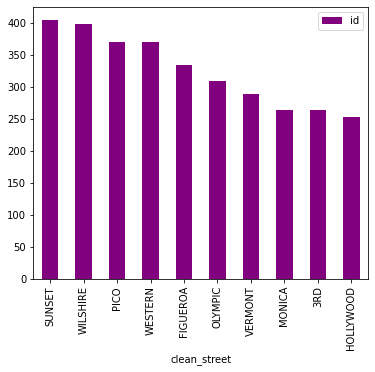

In [66]:
top_streets.plot(x='clean_street', kind='bar', color='purple', figsize=(6,5));

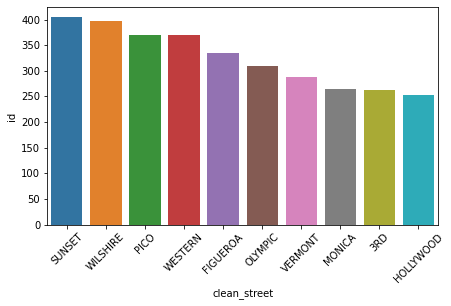

In [67]:
sns.barplot(x='clean_street', y='id', data=top_streets);
plt.xticks(rotation=45)
plt.gcf().set_size_inches(7, 4)

In [68]:
data[data['clean_street']=='SUNSET']

,id,object_name,address,chain,object_type,number,chainint,clean_street_check,clean_street_final,clean_street
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,0,"1814,SUNSET","1814 SUNSET, Los Angeles,USA",SUNSET
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38,1,"5319,SUNSET","5319 SUNSET, Los Angeles,USA",SUNSET
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26,1,"2501,SUNSET","2501 SUNSET, Los Angeles,USA",SUNSET
31,11817,DUNES RESTAURANT,5625 W SUNSET BLVD,True,Restaurant,118,1,"5625,SUNSET","5625 SUNSET, Los Angeles,USA",SUNSET
33,11819,ONO HAWAIIAN BBQ,5539 W SUNSET BLVD,True,Restaurant,35,1,"5539,SUNSET","5539 SUNSET, Los Angeles,USA",SUNSET
...,...,...,...,...,...,...,...,...,...,...
9523,21309,BUTTER'S ICE CREAM,2925 W SUNSET BLVD,False,Restaurant,29,0,"2925,SUNSET","2925 SUNSET, Los Angeles,USA",SUNSET
9527,21313,REGULA GUY'S PIZZA,5173 W SUNSET BLVD,False,Pizza,20,0,"5173,SUNSET","5173 SUNSET, Los Angeles,USA",SUNSET
9562,21348,7-ELEVEN STORE #18778D,7600 W SUNSET BLVD,False,Restaurant,1,0,"7600,SUNSET","7600 SUNSET, Los Angeles,USA",SUNSET
9582,21368,HYDE LLC,8029 W SUNSET BLVD,False,Restaurant,42,0,"8029,SUNSET","8029 SUNSET, Los Angeles,USA",SUNSET


404 restaurants in one street! That is an astounding amount of establishments for one street. However, the population on LA is 3.92 million and these people need to eat every day.

### 8. Find the number of streets that only have one restaurant.

In [69]:
less_streets= data.groupby(data['clean_street'])['id'].count().sort_values().reset_index()
one_street = less_streets[less_streets['id']==1]
one_street

,clean_street,id
0,103,1
1,HEARN,1
2,HEREFORD,1
3,HERITAGE,1
4,HEWITT,1
...,...,...
180,CHURCH,1
181,CHILD'S,1
182,CATALINA,1
183,CASTILLA,1


In [70]:
one_street.count()

clean_street    185
id              185
dtype: int64

There are 185 streets with only one restaurant, the next analysis should be on the population and possibly demographic information on those streets. Perhaps there is a gap in the market?


### 9. For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

In [71]:
sunset=data[data['clean_street']=='SUNSET'].groupby(['number'])['object_name'].count().reset_index()
sunset.columns=['Number_of_seats', 'Restaurant']
wilshire=data[data['clean_street']=='WILSHIRE'].groupby(['number'])['object_name'].count().reset_index()
wilshire.columns=['Number_of_seats', 'Restaurant']
pico=data[data['clean_street']=='PICO'].groupby(['number'])['object_name'].count().reset_index()
pico.columns=['Number_of_seats', 'Restaurant']
western=data[data['clean_street']=='WESTERN'].groupby(['number'])['object_name'].count().reset_index()
western.columns=['Number_of_seats', 'Restaurant']

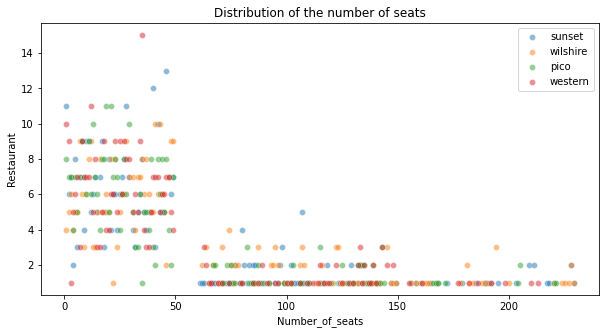

In [72]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=sunset, x="Number_of_seats", y='Restaurant', alpha=0.5)
sns.scatterplot(data=wilshire, x="Number_of_seats", y='Restaurant', alpha=0.5)
sns.scatterplot(data=pico, x="Number_of_seats", y='Restaurant', alpha=0.5)
sns.scatterplot(data=western, x="Number_of_seats", y='Restaurant', alpha=0.5)
plt.title('Distribution of the number of seats');
plt.legend(labels=["sunset","wilshire", 'pico', 'western']);

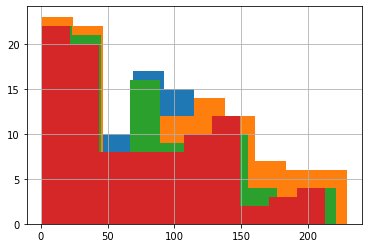

In [73]:
sunset['Number_of_seats'].hist(); #blue
wilshire['Number_of_seats'].hist(); #orange
pico['Number_of_seats'].hist(); #green
western['Number_of_seats'].hist(); #read

I decided to plot a scatter plot with the top 4 streets, any more would have been completely illegible. Due to the very large number of restaurant type establishments in these four streets, I believe it is a fair representation of the trend that these streets represent.  
Apart from the obvious distribution of small seat establishments, the density of the lower line reveals that the restaurants with an abnormally large amounts of seats are common on these four streets.


<b> Overall conclusion  </b> 



The food business in Los Angeles is a thriving and diverse environment with streets full of different types of establishments.  The sizes of the establishment are just as diverse and can change between 2 and 200, the the most popular streets have 400 and 300 establishments like restaurant's, bakery's cafe's and more. The city of Los Angeles is the second biggest city in America with 3.9 million residents, the city center is highly populated and is a famous and popular tourist attraction. This market analysis shows that an investment in the food business in LA is lucrative. From the data reveled in the the analysis it is obvious that most of the food establishments in this city are not part of any chain, which meant that the customers prefer variety and not the same food and atmosphere wherever they go. Most establishments have fewer seats (25 and less). Therefore starting a new and small restaurant with an interesting and unique vibe has a good chance of being profitable. 
    
    
<b> Recommendations </b> 


In order to decide where it makes sense to open a robot run cafe, I believe it would be prudent to do a population analysis. For instance, how many tourists visit the street the new cafe should open in (list the local hotels)? What are the ages of the people that live there (schools, office buildings)? This would keep a new and exiting cafe full of new customers all the time so the "gimmic" will not easily wear off. 


## Step 3. Preparing a presentation
Make a presentation of your research a link to the presentation:


Presentation: https://github.com/tatyanabolton/LA-Restaurants/blob/main/Market%20analysis1.pdf